# Plotting clusters resulting from various dimentionality reduction techniques


In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colorbar
import seaborn as sns


from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)

colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']

cmap = ['#F94144', '#F9C74F']

cmap_name = 'my colormap'

c_map = LinearSegmentedColormap.from_list(cmap_name, cmap)

sns.set_palette(colors)

def plot_cluster(X_reduced, y, title = None):
    f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
    f.set_size_inches(10, 10)
    im = ax.scatter(X_reduced[:,0],X_reduced[:,1],  c = pd.Series(y).apply(lambda x: colors[x]), 
                edgecolor = "None", alpha=1, vmin = 75, vmax = 150, s = 10)


    for child in ax.get_children():
        if isinstance(child, matplotlib.text.Text):
            child.set_fontproperties(font)
    for label in ax.get_yticklabels() :
        label.set_fontproperties(font)
    for label in ax.get_xticklabels() :
        label.set_fontproperties(font)
        
    if title:
        ax.set_title(title, fontproperties = font)
    plt.show()

In [50]:
import numpy as np
import pandas as pd
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.insert(1, module_path + '/src')

from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array

from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

import pandas as pd
import numpy as np

In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/lungsound_preproject_TRAIN.ts')

X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/features/extracted_features_ts_files/lungsound_preproject_TEST.ts')

X_train = from_nested_to_2d_array(X_train)
X_test = from_nested_to_2d_array(X_test)

y_test = y_test.astype(int)
y_train = y_train.astype(int)

X_train.columns = np.arange(len(X_train.columns))
X_test.columns = np.arange(len(X_test.columns))


X_train = X_train.to_numpy()

# PCA and ICA

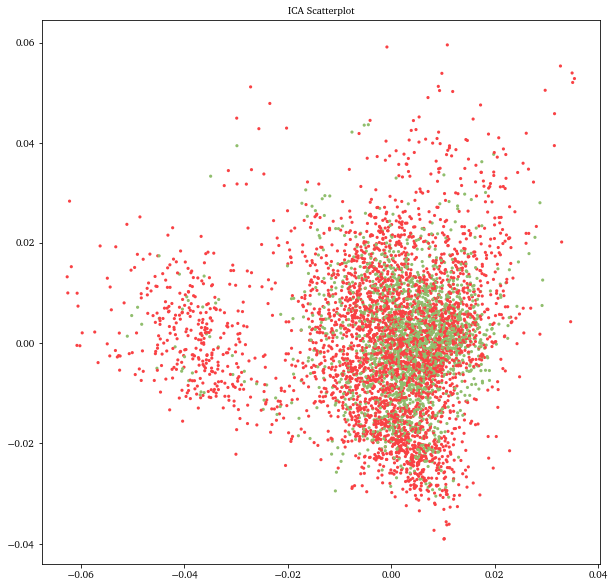

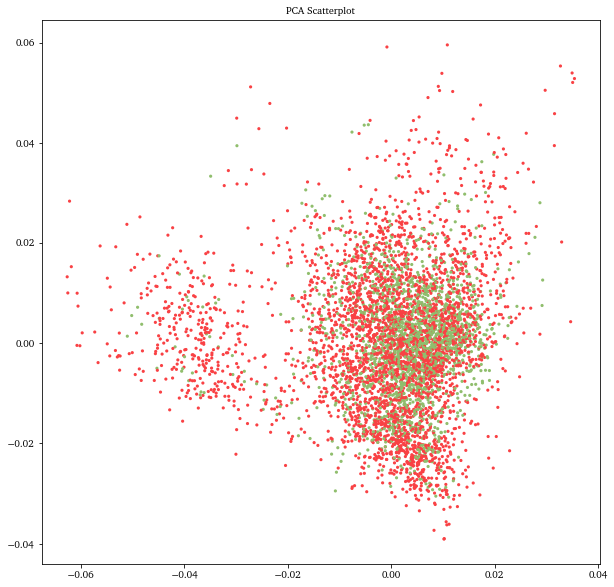

In [81]:
# ICA and PCA (first 2 components)
from sklearn.decomposition import PCA, FastICA # Principal Component Analysis module
ica = FastICA(n_components=2)
ica.fit(X_train)
ica_2d = ica.transform(X_train)
ica_2d_test = ica.transform(X_test)

plot_cluster(ica_2d, y_train, 'ICA Scatterplot')
pca = PCA(n_components=2)
pca.fit(X_train)
pca_2d = pca.transform(X_train)
pca_2d_test = pca.transform(X_test)

plot_cluster(ica_2d, y_train, 'PCA Scatterplot')

plt.show()

# Autoencoder

## Plotting bottleneck layer of autoencoder



In [5]:
encoding_dim = 2
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

# let's create and compile the autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [7]:
# let's train the autoencoder, checking the progress on a validation dataset 

X1, X2, Y1, Y2 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
Y1 = np.asarray(Y1).astype('float32').reshape((-1,1))
Y2 = np.asarray(Y2).astype('float32').reshape((-1,1))


autoencoder.fit(X1, Y1,
                epochs=300,
                batch_size=200,
                shuffle=False,
                verbose = 2,
                validation_data=(X2, Y2))

Epoch 1/300
23/23 - 0s - loss: 0.6664 - val_loss: 0.6556
Epoch 2/300
23/23 - 0s - loss: 0.6624 - val_loss: 0.6522
Epoch 3/300
23/23 - 0s - loss: 0.6595 - val_loss: 0.6498
Epoch 4/300
23/23 - 0s - loss: 0.6574 - val_loss: 0.6480
Epoch 5/300
23/23 - 0s - loss: 0.6557 - val_loss: 0.6466
Epoch 6/300
23/23 - 0s - loss: 0.6545 - val_loss: 0.6454
Epoch 7/300
23/23 - 0s - loss: 0.6534 - val_loss: 0.6445
Epoch 8/300
23/23 - 0s - loss: 0.6526 - val_loss: 0.6437
Epoch 9/300
23/23 - 0s - loss: 0.6519 - val_loss: 0.6431
Epoch 10/300
23/23 - 0s - loss: 0.6513 - val_loss: 0.6425
Epoch 11/300
23/23 - 0s - loss: 0.6508 - val_loss: 0.6421
Epoch 12/300
23/23 - 0s - loss: 0.6504 - val_loss: 0.6417
Epoch 13/300
23/23 - 0s - loss: 0.6500 - val_loss: 0.6413
Epoch 14/300
23/23 - 0s - loss: 0.6497 - val_loss: 0.6410
Epoch 15/300
23/23 - 0s - loss: 0.6494 - val_loss: 0.6408
Epoch 16/300
23/23 - 0s - loss: 0.6491 - val_loss: 0.6405
Epoch 17/300
23/23 - 0s - loss: 0.6489 - val_loss: 0.6403
Epoch 18/300
23/23 - 0s

Epoch 142/300
23/23 - 0s - loss: 0.6180 - val_loss: 0.6111
Epoch 143/300
23/23 - 0s - loss: 0.6173 - val_loss: 0.6105
Epoch 144/300
23/23 - 0s - loss: 0.6167 - val_loss: 0.6098
Epoch 145/300
23/23 - 0s - loss: 0.6161 - val_loss: 0.6092
Epoch 146/300
23/23 - 0s - loss: 0.6154 - val_loss: 0.6085
Epoch 147/300
23/23 - 0s - loss: 0.6148 - val_loss: 0.6079
Epoch 148/300
23/23 - 0s - loss: 0.6142 - val_loss: 0.6073
Epoch 149/300
23/23 - 0s - loss: 0.6136 - val_loss: 0.6066
Epoch 150/300
23/23 - 0s - loss: 0.6130 - val_loss: 0.6060
Epoch 151/300
23/23 - 0s - loss: 0.6124 - val_loss: 0.6054
Epoch 152/300
23/23 - 0s - loss: 0.6119 - val_loss: 0.6048
Epoch 153/300
23/23 - 0s - loss: 0.6113 - val_loss: 0.6042
Epoch 154/300
23/23 - 0s - loss: 0.6108 - val_loss: 0.6036
Epoch 155/300
23/23 - 0s - loss: 0.6102 - val_loss: 0.6031
Epoch 156/300
23/23 - 0s - loss: 0.6097 - val_loss: 0.6025
Epoch 157/300
23/23 - 0s - loss: 0.6092 - val_loss: 0.6019
Epoch 158/300
23/23 - 0s - loss: 0.6087 - val_loss: 0.60

Epoch 281/300
23/23 - 0s - loss: 0.5754 - val_loss: 0.5681
Epoch 282/300
23/23 - 0s - loss: 0.5752 - val_loss: 0.5680
Epoch 283/300
23/23 - 0s - loss: 0.5751 - val_loss: 0.5678
Epoch 284/300
23/23 - 0s - loss: 0.5749 - val_loss: 0.5677
Epoch 285/300
23/23 - 0s - loss: 0.5748 - val_loss: 0.5676
Epoch 286/300
23/23 - 0s - loss: 0.5746 - val_loss: 0.5675
Epoch 287/300
23/23 - 0s - loss: 0.5745 - val_loss: 0.5674
Epoch 288/300
23/23 - 0s - loss: 0.5743 - val_loss: 0.5673
Epoch 289/300
23/23 - 0s - loss: 0.5741 - val_loss: 0.5672
Epoch 290/300
23/23 - 0s - loss: 0.5740 - val_loss: 0.5671
Epoch 291/300
23/23 - 0s - loss: 0.5739 - val_loss: 0.5670
Epoch 292/300
23/23 - 0s - loss: 0.5737 - val_loss: 0.5669
Epoch 293/300
23/23 - 0s - loss: 0.5736 - val_loss: 0.5668
Epoch 294/300
23/23 - 0s - loss: 0.5734 - val_loss: 0.5667
Epoch 295/300
23/23 - 0s - loss: 0.5733 - val_loss: 0.5666
Epoch 296/300
23/23 - 0s - loss: 0.5731 - val_loss: 0.5665
Epoch 297/300
23/23 - 0s - loss: 0.5730 - val_loss: 0.56

In [39]:
# now let's evaluate the coding of the initial features
encoder = Model(input_layer, encoded)
ae = encoder.predict(X_train)
ae_test = encoder.predict(X_test)

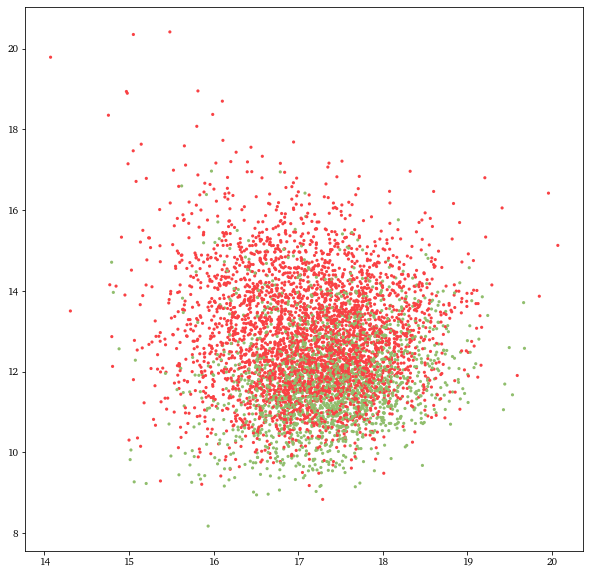

In [82]:
plot_cluster(ae, y_train)

## TSNE

In [48]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_train)
X_embedded_test = TSNE(n_components=2).fit_transform(X_test)

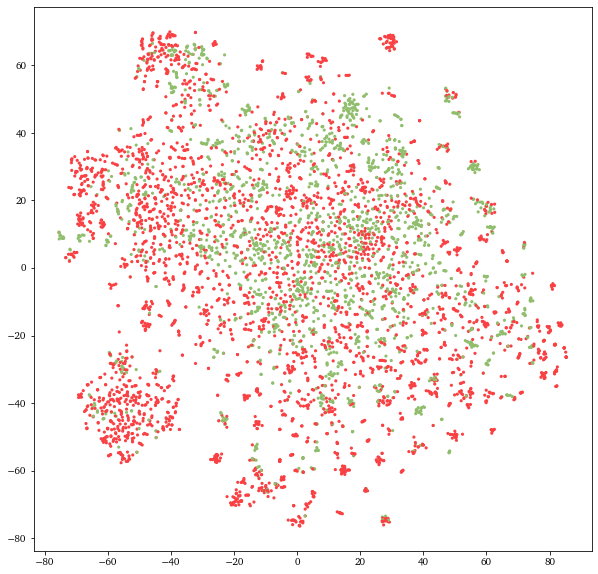

In [83]:
plot_cluster(X_embedded, y_train)

# Elbow method to choose clusters

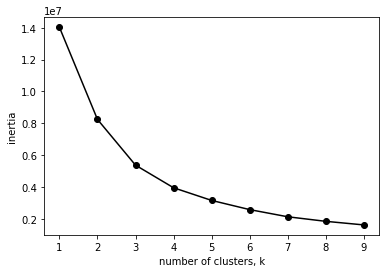

In [54]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    #model.fit(pca_2d) #PCA  --> 6
    #model.fit(ica_2d) # ICA  --> 4
    #model.fit(preds) # Autoencoder --> 3
    model.fit(X_embedded) # TSNE  --> 4
    
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Plotting with k means clusters

### PCA

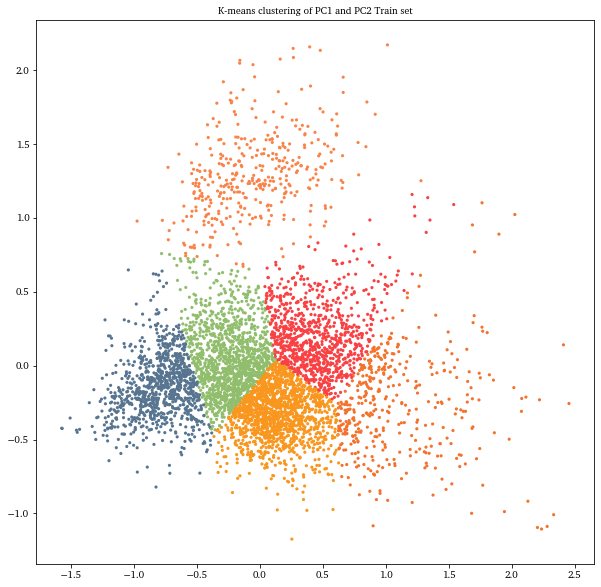

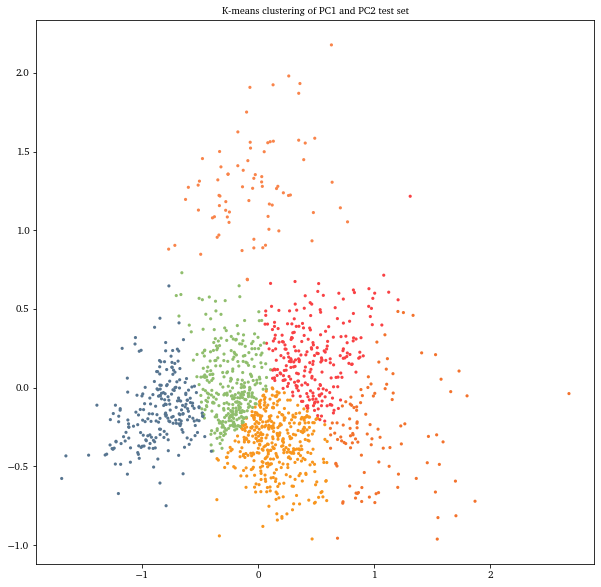

In [87]:
k = 6

model = KMeans(n_clusters=k)
model.fit(pca_2d)

plot_cluster(pca_2d, model.labels_, title = 'K-means clustering of PC1 and PC2 Train set')
plot_cluster(pca_2d_test, model.predict(pca_2d_test), title = 'K-means clustering of PC1 and PC2 test set')

### ICA

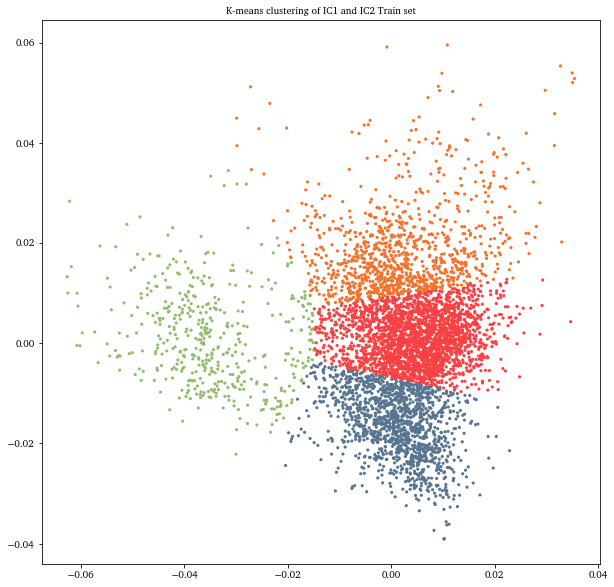

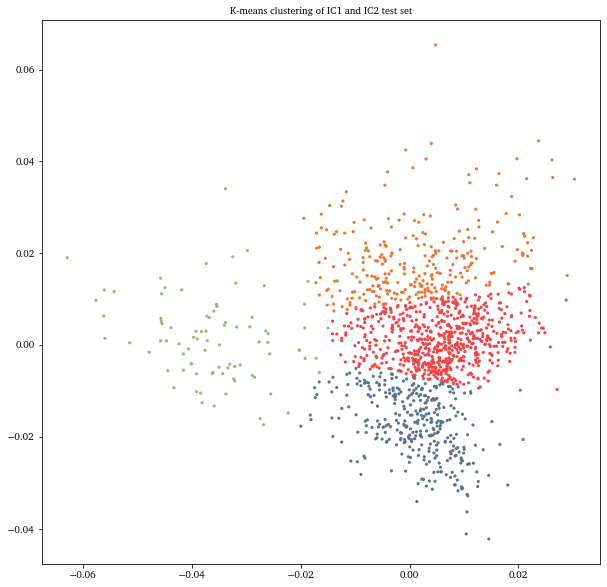

In [93]:
k = 4

model = KMeans(n_clusters=k)
model.fit(ica_2d)

plot_cluster(ica_2d, model.labels_, title = 'K-means clustering of IC1 and IC2 Train set')
plot_cluster(ica_2d_test, model.predict(ica_2d_test), title = 'K-means clustering of IC1 and IC2 test set')

### Autoencoder

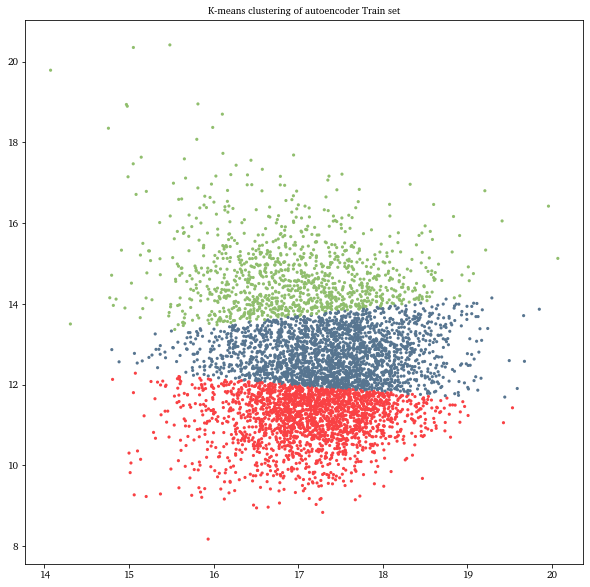

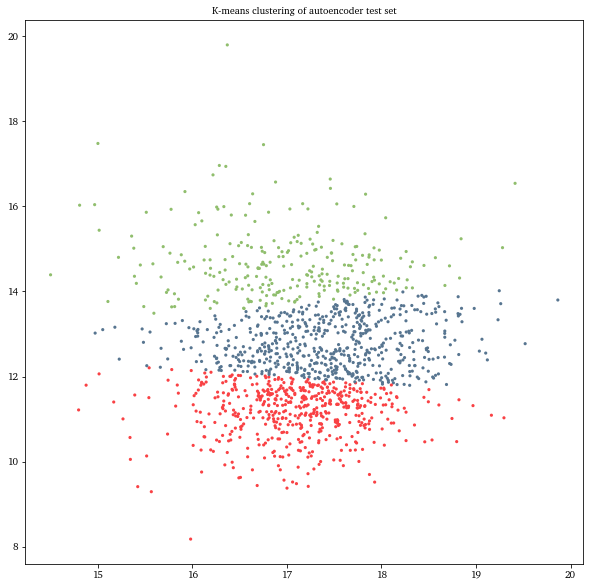

In [94]:
k = 3

model = KMeans(n_clusters=k)
model.fit(ae)

plot_cluster(ae, model.labels_, title = 'K-means clustering of autoencoder Train set')
plot_cluster(ae_test, model.predict(ae_test), title = 'K-means clustering of autoencoder test set')

### TSNE

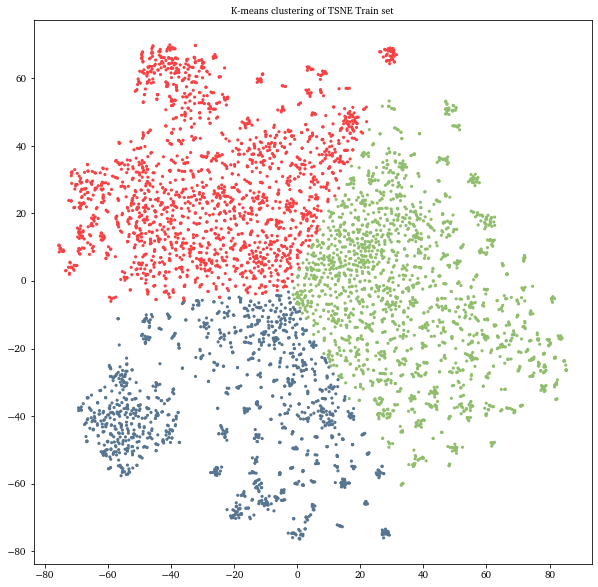

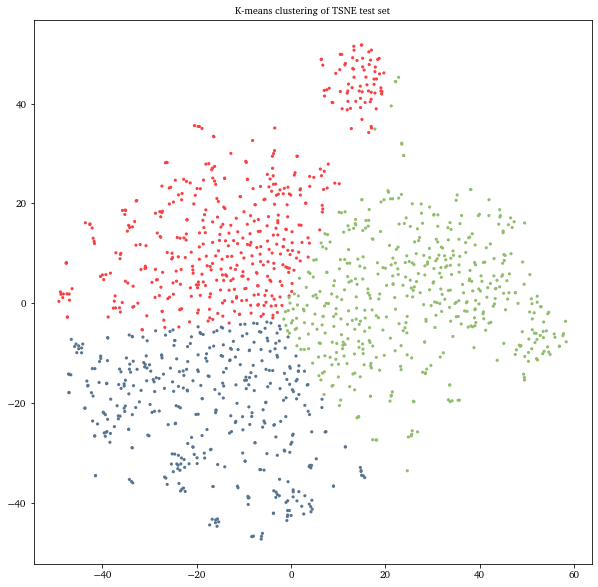

In [95]:
k = 3

model = KMeans(n_clusters=k)
model.fit(X_embedded)

plot_cluster(X_embedded, model.labels_, title = 'K-means clustering of TSNE Train set')
plot_cluster(X_embedded_test, model.predict(X_embedded_test), title = 'K-means clustering of TSNE test set')